In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install finance-datareader

In [3]:
import random
import matplotlib.pyplot as plt
import datetime
import FinanceDataReader as fdr
from sklearn.preprocessing import MinMaxScaler

In [4]:
# 현재 시간으로부터 20년 전 날짜 계산
# start_date = datetime.datetime.now() - datetime.timedelta(days=365*20)
start_date = datetime.datetime.now() - datetime.timedelta(days=365)


df_kospi = fdr.DataReader('KS11', start_date) # KOSPI
df_kosdaq = fdr.DataReader('KQ11', start_date) # KOSDAQ
df_snp500 = fdr.DataReader('US500', start_date) # S&P500
df_nasdaq = fdr.DataReader('IXIC', start_date) # NASDAQ
df_dow = fdr.DataReader('DJI', start_date) # DOW JONES
df_vix = fdr.DataReader('VIX', start_date) # S&P500 VIX

print(df_kospi.head(3))
print(df_kosdaq.head(3))
print(df_snp500.head(3))
print(df_nasdaq.head(3))
print(df_dow.head(3))
print(df_vix.head(3))

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2022-03-28  2721.219971  2737.459961  2707.739990  2729.560059  2729.560059   
2022-03-29  2745.620117  2754.179932  2733.219971  2741.070068  2741.070068   
2022-03-30  2758.310059  2760.600098  2740.020020  2746.739990  2746.739990   

            Volume  
Date                
2022-03-28  768000  
2022-03-29  726700  
2022-03-30  837800  
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2022-03-28  934.179993  934.179993  926.549988  927.109985  927.109985  1400.0
2022-03-29  932.859985  937.830017  930.340027  937.830017  937.830017  1500.0
2022-03-30  942.080017  943.299988  936.909973  939.070007  939.070007  1500.0
                   Open         High          Low        Close    Adj Close  \
Date                     

In [5]:
# normalize
scaler = MinMaxScaler()
norm_kospi = pd.DataFrame(scaler.fit_transform(df_kospi), columns = df_kospi.columns)
norm_kosdaq = pd.DataFrame(scaler.fit_transform(df_kosdaq), columns = df_kosdaq.columns)
norm_snp500 = pd.DataFrame(scaler.fit_transform(df_snp500), columns = df_snp500.columns)
norm_nasdaq = pd.DataFrame(scaler.fit_transform(df_nasdaq), columns = df_nasdaq.columns)
norm_dow = pd.DataFrame(scaler.fit_transform(df_dow), columns = df_snp500.columns)
norm_vix = pd.DataFrame(scaler.fit_transform(df_vix), columns = df_vix.columns)

<Figure size 1000x1500 with 0 Axes>

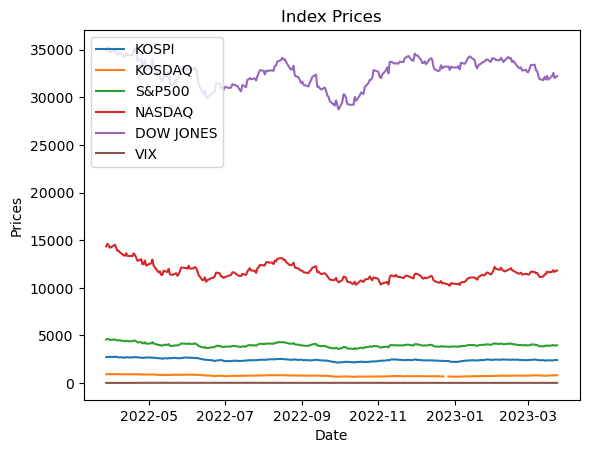

In [6]:
plt.figure(figsize=(10, 15))

_, ax = plt.subplots()

# 3. 여러개의 데이터 그리기
ax.plot(df_kospi.index, df_kospi['Close'], label='KOSPI')
ax.plot(df_kosdaq.index, df_kosdaq['Close'], label='KOSDAQ')
ax.plot(df_snp500.index, df_snp500['Close'], label='S&P500')
ax.plot(df_nasdaq.index, df_nasdaq['Close'], label='NASDAQ')
ax.plot(df_dow.index, df_dow['Close'], label='DOW JONES')
ax.plot(df_vix.index, df_vix['Close'], label='VIX')

# 4. 그래프 꾸미기
plt.title('Index Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend(loc='upper left')

# 5. 그래프 출력
plt.show()

<Figure size 1000x1500 with 0 Axes>

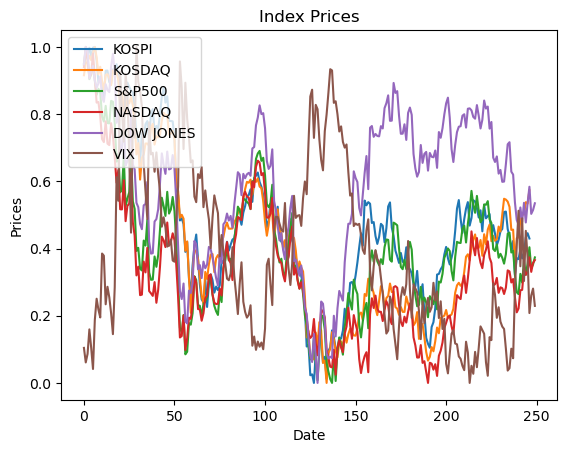

In [7]:
plt.figure(figsize=(10, 15))

_, ax = plt.subplots()

# 3. 여러개의 데이터 그리기
ax.plot(norm_kospi.index, norm_kospi['Close'], label='KOSPI')
ax.plot(norm_kosdaq.index, norm_kosdaq['Close'], label='KOSDAQ')
ax.plot(norm_snp500.index, norm_snp500['Close'], label='S&P500')
ax.plot(norm_nasdaq.index, norm_nasdaq['Close'], label='NASDAQ')
ax.plot(norm_dow.index, norm_dow['Close'], label='DOW JONES')
ax.plot(norm_vix.index, norm_vix['Close'], label='VIX')

# 4. 그래프 꾸미기
plt.title('Index Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend(loc='upper left')

# 5. 그래프 출력
plt.show()

In [21]:
korea_etfs = ['KORU', 'FLKR', 'EWY']
korea_etfs.append('229200') # KODEX 코스닥 150
korea_etfs.append('069500') # KODEX 200
korea_etfs.append('305540') # TIGER 2차전지테마
korea_etfs.append('102110') # TIGER 200
korea_etfs.append('228790') # TIGER 화장품
korea_etfs.append('228800') # TIGER 여행레저
korea_etfs.append('117680') # KODEX 철강
korea_etfs.append('091180') # KODEX 자동차
korea_etfs.append('117700') # KODEX 건설
korea_etfs.append('139220') # TIGER 200 건설
korea_etfs.append('140710') # KODEX 운송
korea_etfs.append('140700') # KODEX 보험
korea_etfs.append('069660') # Kiwoom KOSEF KOSPI 200
korea_etfs.append('364990') # TIGER KRX게임K-뉴딜
korea_etfs.append('228810') # TIGER 미디어컨텐츠

In [26]:
print(korea_etfs)

['KORU', 'FLKR', 'EWY', '229200', '069500', '305540', '102110', '228790', '228800', '117680', '091180', '117700', '139220', '140710', '140700', '069660', '364990', '228810']


In [33]:
df_korea_etfs = pd.DataFrame()
print(df_korea_etfs)

Empty DataFrame
Columns: []
Index: []


In [91]:
start_date = datetime.datetime.now() - datetime.timedelta(days=10000)

df_korea_etfs = {}

for etf in korea_etfs:
    df_korea_etfs[etf] = fdr.DataReader(etf, start_date)

In [95]:
for etf in korea_etfs:
    print(df_korea_etfs[etf].shape)

(2508, 6)
(1325, 6)
(5753, 6)
(1841, 6)
(5058, 6)
(1117, 6)
(3703, 6)
(1837, 6)
(1837, 6)
(3308, 6)
(4139, 6)
(3308, 6)
(2951, 6)
(2937, 6)
(2937, 6)
(5058, 6)
(610, 6)
(1837, 6)


In [67]:
for etf in korea_etfs:
    print(f'\n{etf}')
    print(df_korea_etfs[etf].head(2))


KORU
            Open  High   Low  Close  Adj Close  Volume
Date                                                  
2022-12-27  8.00  8.08  7.95   8.01   7.966346  158600
2022-12-28  7.87  7.93  7.55   7.59   7.548635  113800

FLKR
                 Open       High        Low  Close  Adj Close  Volume
Date                                                                 
2022-12-27  20.049999  20.070000  20.000000  20.00  19.859684    9900
2022-12-28  19.879999  19.959999  19.639999  19.67  19.532000   15800

EWY
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2022-12-27  57.599998  57.820000  57.520000  57.650002  57.650002  2665900
2022-12-28  57.369999  57.470001  56.509998  56.610001  56.610001  2829200

229200
             Open   High    Low  Close    Volume    Change
Date                                                      
2022-12-26   9790   9975   9730   9965  13077987  0.01891

In [93]:
norm_korea_etfs = {}

for etf in korea_etfs:
    df = df_korea_etfs[etf]
    norm_korea_etfs[etf] = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
    
# for etf in korea_etfs:
#     print(norm_korea_etfs[etf].head(2))

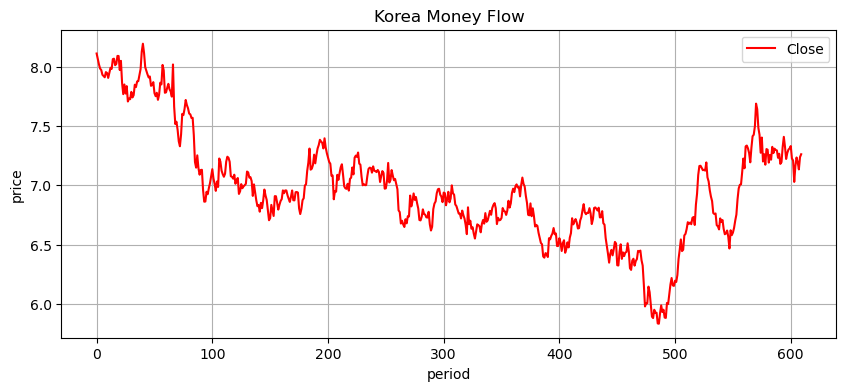

In [96]:
cols = df_korea_etfs['KORU'].columns

rep_korea_etfs = pd.DataFrame(columns = cols)

for col in cols:
    try:
        for etf in korea_etfs:
            if etf == 'KORU':
                rep_korea_etfs[col] = norm_korea_etfs[etf][col]
            else:
                rep_korea_etfs[col] += norm_korea_etfs[etf][col]
    except KeyError:
        continue
            
plt.figure(figsize=(10, 4))

plt.title('Korea Money Flow')
plt.ylabel('price')
plt.xlabel('period')
plt.grid()

plt.plot(rep_korea_etfs['Close'], label='Close', color='r')
plt.legend(loc='best')

plt.show()

<Figure size 1000x1500 with 0 Axes>

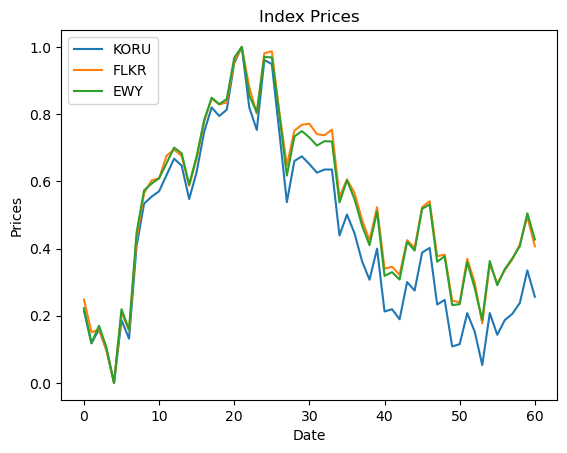

In [16]:
norm_koru = pd.DataFrame(scaler.fit_transform(df_koru), columns = df_koru.columns)
norm_flkr = pd.DataFrame(scaler.fit_transform(df_flkr), columns = df_flkr.columns)
norm_ewy = pd.DataFrame(scaler.fit_transform(df_ewy), columns = df_ewy.columns)


plt.figure(figsize=(10, 15))

_, ax = plt.subplots()


ax.plot(norm_koru.index, norm_koru['Close'], label='KORU')
ax.plot(norm_flkr.index, norm_flkr['Close'], label='FLKR')
ax.plot(norm_ewy.index, norm_ewy['Close'], label='EWY')


# 3. 여러개의 데이터 그리기
ax.plot(norm_kospi.index, norm_kospi['Close'], label='KOSPI')
ax.plot(norm_kosdaq.index, norm_kosdaq['Close'], label='KOSDAQ')
ax.plot(norm_snp500.index, norm_snp500['Close'], label='S&P500')
ax.plot(norm_nasdaq.index, norm_nasdaq['Close'], label='NASDAQ')
ax.plot(norm_dow.index, norm_dow['Close'], label='DOW JONES')
ax.plot(norm_vix.index, norm_vix['Close'], label='VIX')

# 4. 그래프 꾸미기
plt.title('Index Prices')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.legend(loc='upper left')

# 5. 그래프 출력
plt.show()

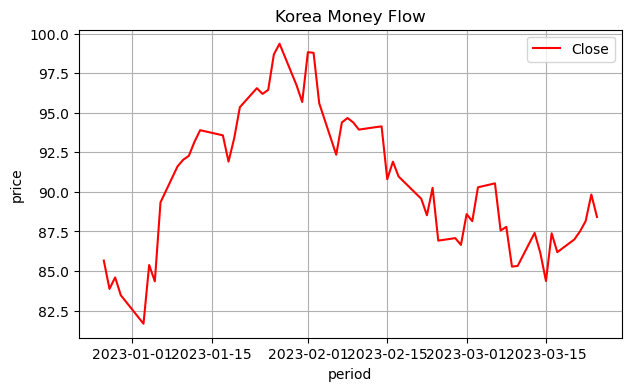

In [17]:
cols = df_koru.columns
df_korea = pd.DataFrame(columns=cols)

for col in cols:
    df_korea[col] = df_koru[col] + df_flkr[col] + df_ewy[col]


plt.figure(figsize=(7, 4))

plt.title('Korea Money Flow')
plt.ylabel('price')
plt.xlabel('period')
plt.grid()

plt.plot(df_korea['Close'], label='Close', color='r')
plt.legend(loc='best')

plt.show()

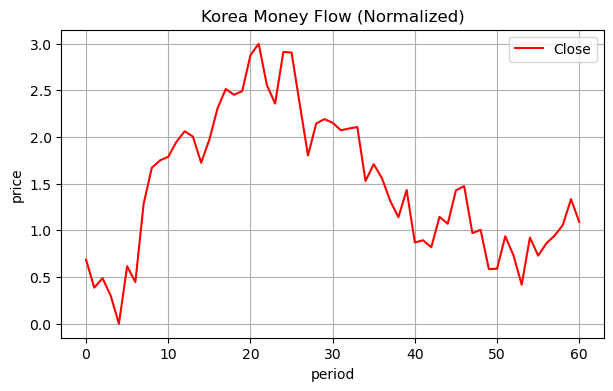

In [19]:
cols = norm_koru.columns
norm_korea = pd.DataFrame(columns=cols)

for col in cols:
    norm_korea[col] = norm_koru[col] + norm_flkr[col] + norm_ewy[col]


plt.figure(figsize=(7, 4))

plt.title('Korea Money Flow (Normalized)')
plt.ylabel('price')
plt.xlabel('period')
plt.grid()

plt.plot(norm_korea['Close'], label='Close', color='r')
plt.legend(loc='best')

plt.show()